In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data = load_iris(as_frame=True)
x = data.data
y = data.target

In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [5]:
values = y.unique()
print(values)

[0 1 2]


In [6]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [8]:
x_train.shape,y_train.shape

((120, 4), (120,))

In [9]:
x_test.shape , y_test.shape

((30, 4), (30,))

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
y_preds = knc.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
print(f"Accuracy Score = {accuracy_score(y_test,y_preds)}")
print("\n",classification_report(y_test,y_preds))

Accuracy Score = 0.9

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.85      0.92      0.88        12
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



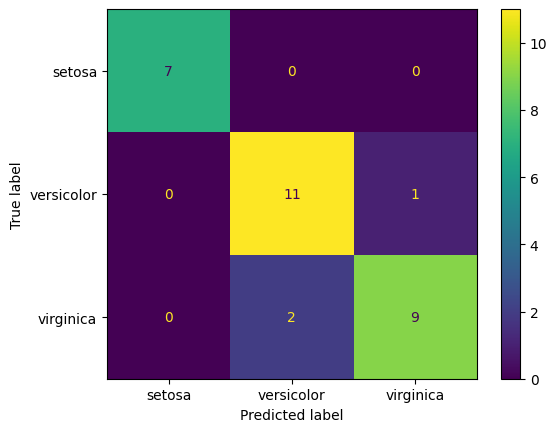

In [31]:
cm = confusion_matrix(y_test,y_preds)
cm_plt = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['setosa','versicolor','virginica'])
cm_plt.plot()
